/Users/fritt/anaconda3/envs/adv_mit/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fritt/anaconda3/envs/adv_mit/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


184
16
torch.Size([1, 768, 17, 17])


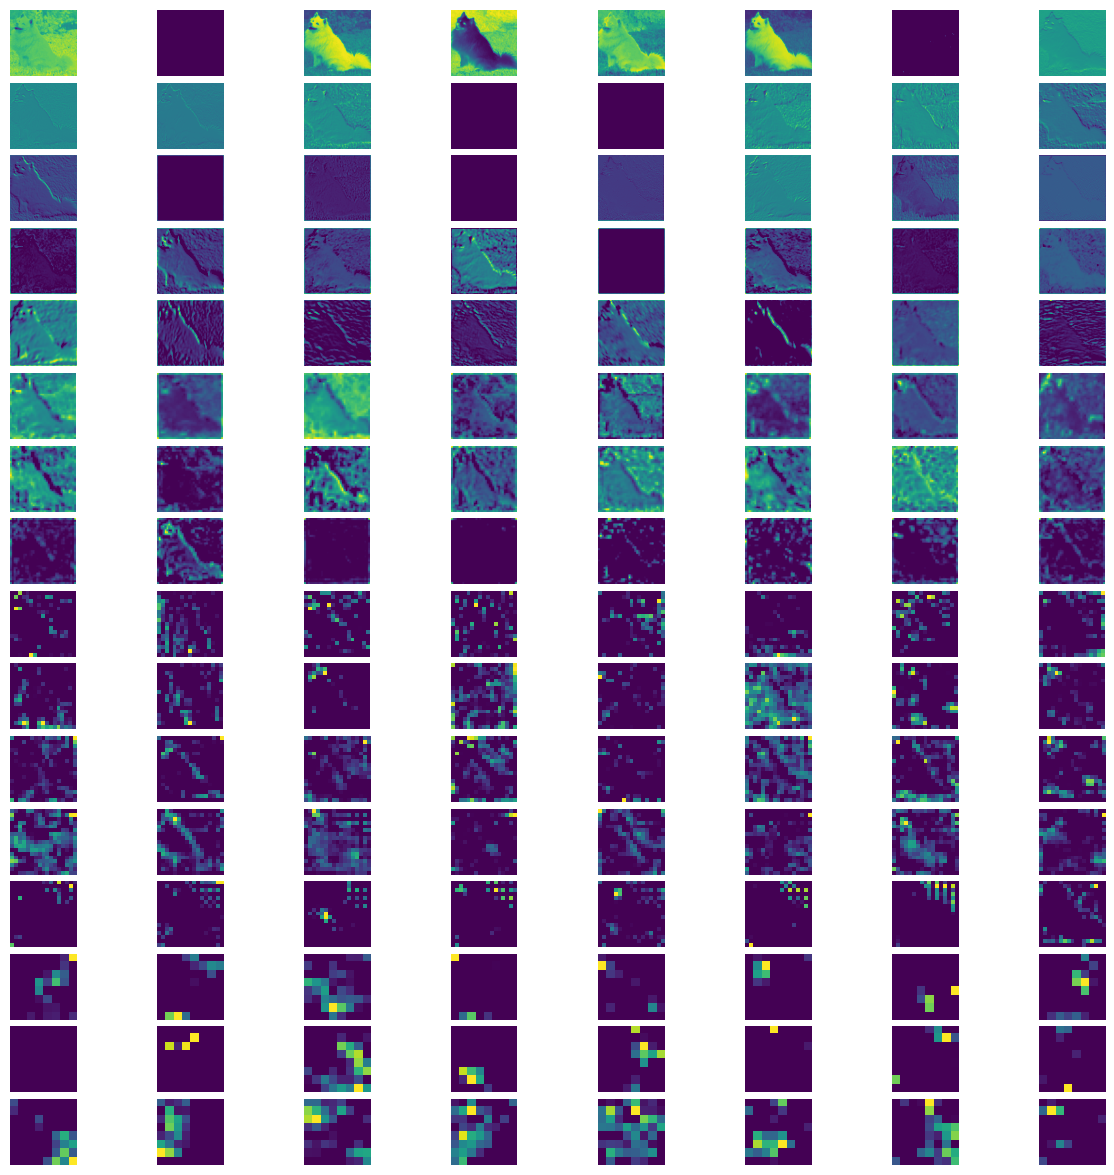

AttributeError: 'FGSM' object has no attribute 'name'

In [8]:
import sys
import torch
import torchattacks
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the Inception v3 model
model = models.inception_v3(pretrained=True)
model.eval()

# Load an image and apply the necessary transformations
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
    ])
    img = Image.open(image_path).convert('RGB')
    img = transform(img).unsqueeze(0)
    return img

image_path = "./local_files/dog.jpg"
img = preprocess_image(image_path)

# Extract feature maps from the Inception v3 model
def get_feature_maps(img, model):
    feature_maps = []

    def hook(module, input, output):
        feature_maps.append(output.detach())

    layers = [
        model.Conv2d_1a_3x3,
        model.Conv2d_2a_3x3,
        model.Conv2d_2b_3x3,
        model.Conv2d_3b_1x1,
        model.Conv2d_4a_3x3,
        model.Mixed_5b,
        model.Mixed_5c,
        model.Mixed_5d,
        model.Mixed_6a,
        model.Mixed_6b,
        model.Mixed_6c,
        model.Mixed_6d,
        model.Mixed_6e,
        model.Mixed_7a,
        model.Mixed_7b,
        model.Mixed_7c
    ]
    handles = [layer.register_forward_hook(hook) for layer in layers]

    _ = model(img)

    for handle in handles:
        handle.remove()

    return feature_maps

attack = torchattacks.FGSM(model, eps=2/255)

feature_maps = get_feature_maps(img, model)


print(sys.getsizeof(feature_maps))
print(len(feature_maps))
print(feature_maps[10].size())
# Visualize feature maps
def visualize_feature_maps(feature_maps, ncols=8):
    nrows = len(feature_maps)
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

    for row in range(nrows):
        for col in range(ncols):
            axs[row, col].imshow(feature_maps[row][0, col].cpu().numpy())
            axs[row, col].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

visualize_feature_maps(feature_maps)


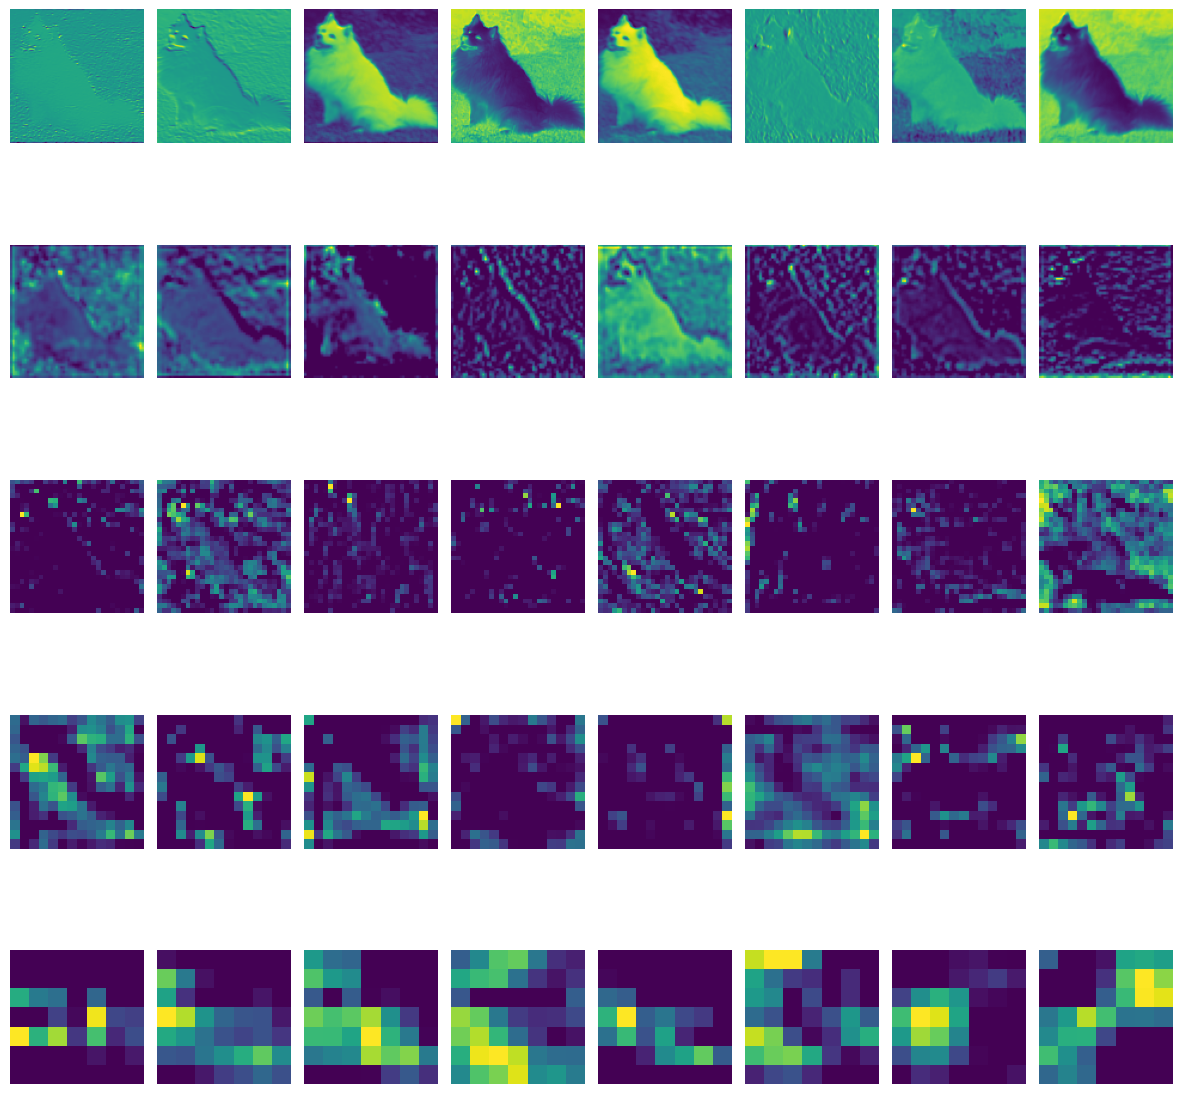

In [5]:
# Load the ResNet-18 model
model = models.resnet18(pretrained=True)
model.eval()

# Load an image and apply the necessary transformations
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
    img = Image.open(image_path).convert('RGB')
    img = transform(img).unsqueeze(0)
    return img

image_path = "./local_files/dog.jpg"
img = preprocess_image(image_path)

# Extract feature maps from the ResNet-18 model
def get_feature_maps(img, model):
    feature_maps = []

    def hook(module, input, output):
        feature_maps.append(output.detach())

    layers = [module for name, module in model.named_children() if isinstance(module, (torch.nn.Conv2d, torch.nn.Sequential))]

    handles = [layer.register_forward_hook(hook) for layer in layers]

    _ = model(img)

    for handle in handles:
        handle.remove()

    return feature_maps

feature_maps = get_feature_maps(img, model)

# Visualize feature maps
def visualize_feature_maps(feature_maps, ncols=8):
    nrows = len(feature_maps)
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

    for row in range(nrows):
        for col in range(ncols):
            axs[row, col].imshow(feature_maps[row][0, col].cpu().numpy())
            axs[row, col].axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

visualize_feature_maps(feature_maps)
